<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/20_3_%D0%9F%D1%80%D0%B5%D0%B4%D0%B2%D0%B0%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Обработка текстов с помощью нейронных сетей](https://colab.research.google.com/drive/1tPZPtZsEi4rv4J_4tcOBMDgyUNQDYKCX)
2. [Сравнение архитектур нейронных сетей для обработки текста](https://colab.research.google.com/drive/1KEFUgyBcqGaXGZEU-7MHENn5RH_AIvfH)
3. Предварительно обученные векторные представления
4. [Домашняя работа](https://colab.research.google.com/drive/1t7rrJV4BSzFF8ZuiUQASkkq8ijzf0IiJ)

При создании слоя `Embedding` (внутренний словарь векторов токенов), его веса инициализируются случайными значениями, как в случае с любым другим слоем. В процессе обучения векторы слов постепенно корректируются посредством обратного
распространения ошибки, и пространство превращается в структурированную модель, пригодную к использованию. После полного обучения пространство векторов приобретет законченную структуру, специализированную под решение конкретной задачи.

Иногда обучающих данных оказывается слишком мало, чтобы можно было обучить
векторное представление слов для конкретной задачи. Как в нашем примере с Русскими писателями.

**Что же сделать в таком случае?**

Вместо обучения векторного представления совместно с решением задачи можно
загрузить предварительно сформированные векторные представления, хорошо
организованные и обладающие полезными свойствами, которые охватывают основные аспекты языковой структуры.

> Использование предварительно обученных векторных представлений слов в обработке естественного языка обосновывается почти так же, как использование предварительно обученных сверточных нейронных сетей в классификации изображений: **отсутствием достаточного объема данных для выделения по-настоящему мощных признаков**.

Когда мы решаем любую задачу глубоко обучения, то предполагаем, что для ее решения мы имеем достаточное количество обобщенных признаков (визуальных или семантических).

В данном случае есть смысл повторно использовать признаки, выделенные в ходе решения другой задачи.


Такие векторные представления обычно вычисляются с использованием статистики встречаемости слов и применением разнообразных методик, иногда с привлечением нейронных сетей, иногда нет.

Идея плотных, малоразмерных пространств векторных представлений слов, обучаемых без учителя, первоначально была исследована Йошуа Бенгио (Yoshua Bengio) с коллегами в начале 2000-х годов, но более основательное ее исследование и практическое применение началось только после выхода одной из самых известных и успешных схем реализации векторного представления слов — алгоритма `word2vec` (https://code.google.com/archive/p/word2vec), разработанного в 2013 году Томасом Миколовым (Tomas Mikolov) из компании Google.

Существует множество разнообразных предварительно обученных векторных представлений слов, которые можно загрузить и использовать в слое Embedding.
`Word2vec` — одно из них. Другое популярное представление называется «глобальные векторы представления слов» (Global Vectors for Word Representation,
`GloVe`, https://nlp.stanford.edu/projects/glove) и разработано исследователями из Стэнфорда в 2014-м.

**Векторное представление слов** (word embedding) - это название технологии моделирования языка и изучения признаков в NLP (Natural language processing, обработка естественного языка), соотносящей словарь
с векторами действительных чисел, с использованием таких продуктов, как
Word2vec, GloVe и fastText.

**А что делать с русским языком?**

А с русским языком, все тоже хорошо! Проект ["Наташа"](https://natasha.github.io/) покрывает неплохо потребности исследователей и разработчиков в русскоязычном сегменте.

На хабре переодически возникают статьи по Наташе. И вот цитата одной из них:

>Для новостных статей качество на всех задачах сравнимо или превосходит существующие решения. Например с задачей NER Natasha справляется на 1 процентный пункт хуже, чем Deeppavlov BERT NER (F1 PER 0.97, LOC 0.91, ORG 0.85), модель весит в 75 раз меньше (27МБ), работает на CPU в 2 раза быстрее (25 статей/сек), чем BERT NER на GPU.

Вот такие комплименты "отвешивают" разработчики Наташе. Теперь пришло и наше время проверить Натали на прочность!

Не поленитесь и обязательно посмотрите видео про историю проект [Наташа](https://www.youtube.com/watch?v=l-9v2KBxlKc) и для чего он нужен. А самые внимательные узнают про лучший на сегодняшний день источник русскоязычных датасетов, а он спрятан в репозиториях Наташи (`natasha/corus`).

## Наташа обучит векторные представления

И так в состав Наташи входит библиотека Navec - библиотека предварительно обученных встраиваний слов для русского языка. У библиотеки есть конкурент (и это хорошая новость для нас) RusVectores, однако, он проигрывает  в более чем 10 раз по быстродействию и занимает в 10 раз больше мест.

> Natasha Navec = большая база текстов русского языка (145GB) + GloVe + квантизация

Раз мы упомянули квантизацию, то поясним, что это такое.

> Квантизация – это процесс снижения точности весов, смещений и активаций, с целью экономии памяти. Другими словами, процесс квантизации – это процесс преобразования весов и параметров нейронной сети, из часто используемых, 32-битных чисел с плавающей запятой в меньшую размерность, например, в 8-битные целые числа.

А также это процесс удаления "лишних" связей (прунинг весов). В некоторых статьях пишут, что прунинг (pruning) - это один из приемов квантизации, а в некоторых выделяют в отдельный метод оптимизации моделей.

Квантизация дает несколько преимуществ:

* При обработке 8-битных целочисленных данных графические процессоры NVIDIA используют более быстрые и дешевые 8-битные тензорные ядра для вычисления операций свертки и умножения матриц. Это дает большую пропускную способность вычислений.

* Перемещение данных из памяти в вычислительные элементы (потоковы мультипроцессоры в графических процессорах NVIDIA) требует времени и энергии, а также выделяет тепло. Снижение точности данных активации и параметров с 32-битных чисел с плавающей запятой до 8-битных целых чисел приводит к 4-кратному сокращению данных, что экономит электроэнергию и снижает выделяемое тепло. Так что "квантизация" - это "забота об экологии" и снижение индекса $CO_2$.

* Уменьшение объема памяти означает, что модель требует меньше места для хранения, меньше параметров для обновления и т.д.

### Загрузка предобученных Embedding

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-02-29 13:42:14--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  10.8MB/s    in 6.4s    

2024-02-29 13:42:22 (7.85 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



`hudlit_12B_500K_300d_100q` — это GloVe-эмбединги обученные на 145ГБ художественной литературы. Архив с текстами взят из проекта RUSSE и использует оригинальную реализацию GloVe на C, обернутую в удобный Python-интерфейс.

Размер словаря `hudlit_12B_500K_300d_100q` — 500 000 записей, он покрывает 98% слов в художественных текстах. Оптимальная размерность векторов — 300. Таблица 500 000 × 300 из float-чисел занимает 578МБ, размер архива с весами `hudlit_12B_500K_300d_100q` в 12 раз меньше (48МБ). И это благодаря квантизации.

В качестве примера квантизации рассмотрим следующую матрицу:

```
-0.220 -0.071  0.320 -0.279  0.376  0.409  0.340 -0.329  0.400
 0.046  0.870 -0.163  0.075  0.198 -0.357 -0.279  0.267  0.239
 0.111  0.057  0.746 -0.240 -0.254  0.504  0.202  0.212  0.570
 0.529  0.088  0.444 -0.005 -0.003 -0.350 -0.001  0.472  0.635
-0.170  0.677  0.212  0.202 -0.030  0.279  0.229 -0.475 -0.031
```

Нам необходимо заменить 32-битные `float` - числа на 8-битные коды:

$[−∞, −0.86)$ — код 0,

$[−0.86, -0.79)$ — код 1,

$[-0.79, -0.74)$ — код 2,

$…$,

$[0.86, ∞)$ — 255.

Размер таблицы уменьшится в 4 раза ($32 / 8 = 4$):

```
    63    105    215     49    225    230    219     39    228
   143    255     78    152    187     34     49    204    198
   163    146    253     58     55    240    188    191    246
   243    155    234    127    127     35    128    237    249
    76    251    191    188    118    207    195     18    118
```    

In [ ]:
!pip install navec

In [ ]:
from navec import Navec

navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

### Подготовка датасета

Повторим шаги из прошлого Блокнота:

**Шаг 1. Загрузка базы писателей Русской литературы**

Воспользуемся новым методом для нас загрузки датасета, описанным в официальной документации Keras. Данный метод позволяет избежать повторной загрузки, если данные были раньше скачаны. Метод возвращает путь к папке с датасетом.

In [ ]:
import keras
data_path = keras.utils.get_file(
    "russian_literature.zip",
    "https://storage.yandexcloud.net/academy.ai/russian_literature.zip"
)

21547079/21547079 [==============================] - 4s 0us/step


**Шаг 2. Распаковка датасета**

In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "{data_path}" -d ./dataset

**Шаг 3. Формирование датасета**

Отберем для обучения 6 произвольных писателей. Число токенов ограничим в 40 тыс. Предобученный эмбединг позволяет нам обучаться на малых выборках даже порядка нескольких тысяч слов.

In [ ]:
CLASS_LIST=["Dostoevsky", "Tolstoy", "Turgenev", "Chekhov", "Lermontov", "Pushkin"]

In [ ]:
# Загрузка необходимых библиотек
import glob # Вспомогательный модуль для работы с файловой системой


all_texts = {} # Собираем в словарь весь датасет

for author in CLASS_LIST:
    all_texts[author] = '' # Инициализируем пустой строкой новый ключ словаря
    for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)): # Поиск файлов по шаблону
        with open(f'{path}', 'r', errors='ignore') as f: # игнорируем ошибки (например символы из другой кодировки)
            # Загрузка содержимого файла в строку
            text = f.read()

        all_texts[author]  += ' ' + text.replace('\n', ' ') # Заменяем символ перехода на новую строку пробелом

**Шаг 4. Токенизация**

In [ ]:
from keras.preprocessing.text import Tokenizer

embedding_dim = 300    # размерность векторов эмбединга (300d в имени эмбединга)
max_words = 10000      # Количество слов, рассматриваемых как признаки

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False)


# Построение частотного словаря по текстам
tokenizer.fit_on_texts(all_texts.values())

In [ ]:
**Шаг 5. Преобразование текста в последовательность**

Преобразуем текст в последовательности:

In [ ]:
seq_train = tokenizer.texts_to_sequences(all_texts.values())

**Шаг 6. Балансировка датасета**

Так как мы тексты по всем писателям обрезаем до одной длины (40 тыс слов), то наш датасет сбалансирован автоматически:

In [ ]:
seq_train_balance = [seq_train[cls][:40000] for cls in range(len(CLASS_LIST))]

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in seq_train_balance)
print(f'Датасет состоит из {total} слов')

Датасет состоит из 240000 слов


In [ ]:
import numpy as np

print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))

Общая выборка по писателям (по словам):
Dostoevsky - 40000 слов, доля в общей базе: 16.67%
Tolstoy - 40000 слов, доля в общей базе: 16.67%
Turgenev - 40000 слов, доля в общей базе: 16.67%
Chekhov - 40000 слов, доля в общей базе: 16.67%
Lermontov - 40000 слов, доля в общей базе: 16.67%
Pushkin - 40000 слов, доля в общей базе: 16.67%
Среднее значение слов:  40000.0
Медианное значение слов:  40000.0


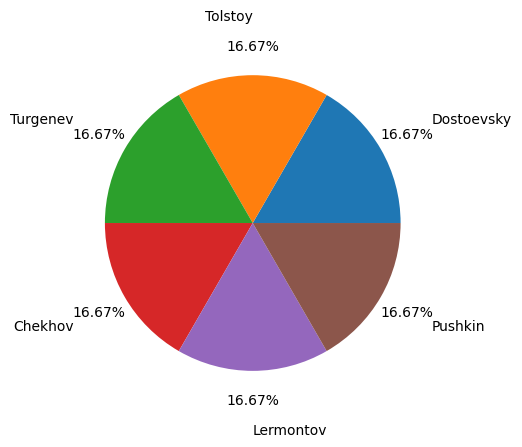

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance], # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

**Шаг 7. Нарезка примеров из текста методом скользящего окна**

In [ ]:
WIN_SIZE = 1000   # Ширина окна в токенах
WIN_STEP = 100    # Шаг окна в токенах

# Функция разбиения последовательности на отрезки скользящим окном
# Последовательность разбивается на части до последнего полного окна
# Параметры:
# sequence - последовательность токенов
# win_size - размер окна
# step - шаг окна
def seq_split(sequence, win_size, step):
    # Делим строку на отрезки с помощью генератора цикла
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

def seq_vectorize(
    seq_list,   # Последовательность
    test_split, # Доля на тестовую сборку
    class_list, # Список классов
    win_size,   # Ширина скользящего окна
    step        # Шаг скользящего окна
):

    # Списки для результирующих данных
    x_train, y_train, x_test, y_test =  [], [], [], []

    # Пробежимся по всем классам:
    for class_item in class_list:
        # Получим индекс класса
        cls = class_list.index(class_item)

        # Пороговое значение индекса для разбивки на тестовую и обучающую выборки
        gate_split = int(len(seq_list[cls]) * (1-test_split))

        # Разбиваем последовательность токенов класса на отрезки
        vectors_train = seq_split(seq_list[cls][:gate_split], win_size, step) # последовательность до порога попадет в обучающую выборку
        vectors_test = seq_split(seq_list[cls][gate_split:], win_size, step)  # последовательность после порога попадет в тестовую выборку

        # Добавляем отрезки в выборку
        x_train += vectors_train
        x_test += vectors_test

        # Для всех отрезков класса добавляем метки класса в виде one-hot-encoding
        # Каждую метку берем len(vectors) раз, так она одинакова для всех выборок одного класса
        y_train += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_train)
        y_test += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_test)

    # Возвращаем результатов как numpy-массивов
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
x_train, y_train, x_test, y_test = seq_vectorize(seq_train_balance, 0.1, CLASS_LIST, WIN_SIZE, WIN_STEP)

In [ ]:
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')

Форма входных данных для обучающей выборки: (2106, 1000)
Форма выходных данных (меток) для обучающей выборки: (2106, 6)


In [ ]:
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')

Форма входных данных для тестовой выборки: (186, 1000)
Форма выходных данных (меток) для тестовой выборки: (186, 6)


**Шаг 8. Определим вспомогательные функции**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

# Вывод графиков точности и ошибки
def show_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода предсказанных значений
def show_confusion_matrix(y_true, y_pred, class_labels):
    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
    plt.show()


    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

### Архитектура сети

Так как мы используем предварительно сформированные векторные представления, то это накладывает ограничения на размерность входного слоя `Embedding` нашей модели (смотрим по имени файла navec_hudlit_v1_12B_500K_**300d**_100q.tar):

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE))
model.add(BatchNormalization())
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(len(CLASS_LIST), activation='softmax'))

### Загрузка весов

Теперь создадим матрицу векторных представлений, которую можно будет передать на вход слоя `Embedding`. Это должна быть матрица с формой `(максимальное число слов, размерность представления)`, каждый элемент `i` которой содержит вектор с размером, равным размерности представления, соответствующий слову с индексом `i` в индексе (созданном в ходе токенизации).

In [ ]:
import numpy as np

word_index = tokenizer.word_index
embeddings_index = navec

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Слой Embedding в качестве весов использует - двумерную матрицу с вещественными числами, каждый `i`-й элемент которой — это вектор, связанный с `i`-м словом в индексе. Все довольно просто. Загрузим подготовленную матрицу в слой `Embedding` — первый слой модели.

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Мы также заморозили слой `Embedding` (присвоив атрибуту `trainable` значение
`False`). Когда мы знакомились с особенностями применения предварительно обученных сверточных нейронных сетей мы говорили, что если в модели имеются уже обученные части (как наш слой Embedding) и части, инициализированные случайными значениями (как наш классификатор), то обученные части не должны изменяться в ходе обучения, чтобы не потерять свои знания.

Большие изменения градиента, вызванные случайными начальными значениями
в необученных слоях, могут оказать разрушительное влияние на обученные слои.

### Обучение модели

Будем использовать небольшой размер пакетов `batch_size`, поскольку используем ограниченное число примеров. Тем более мы еще заберем 10% от обучающей выборки на проверочную выборку.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.1)
model.save_weights('pre_trained_model.h5') # можно сохранять не только модели, но и веса

Epoch 1/50
30/30 [==============================] - 8s 32ms/step - loss: 2.1867 - accuracy: 0.2992 - val_loss: 2.5335 - val_accuracy: 0.0190
Epoch 2/50
30/30 [==============================] - 0s 16ms/step - loss: 0.3685 - accuracy: 0.8681 - val_loss: 8.6390 - val_accuracy: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 0s 17ms/step - loss: 0.1406 - accuracy: 0.9583 - val_loss: 12.5709 - val_accuracy: 0.0000e+00
Epoch 4/50
30/30 [==============================] - 0s 15ms/step - loss: 0.0720 - accuracy: 0.9794 - val_loss: 14.9048 - val_accuracy: 0.0000e+00
Epoch 5/50
30/30 [==============================] - 0s 14ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 15.4909 - val_accuracy: 0.0000e+00
Epoch 6/50
30/30 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 15.3682 - val_accuracy: 0.0000e+00
Epoch 7/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 13.3540 - val_accur

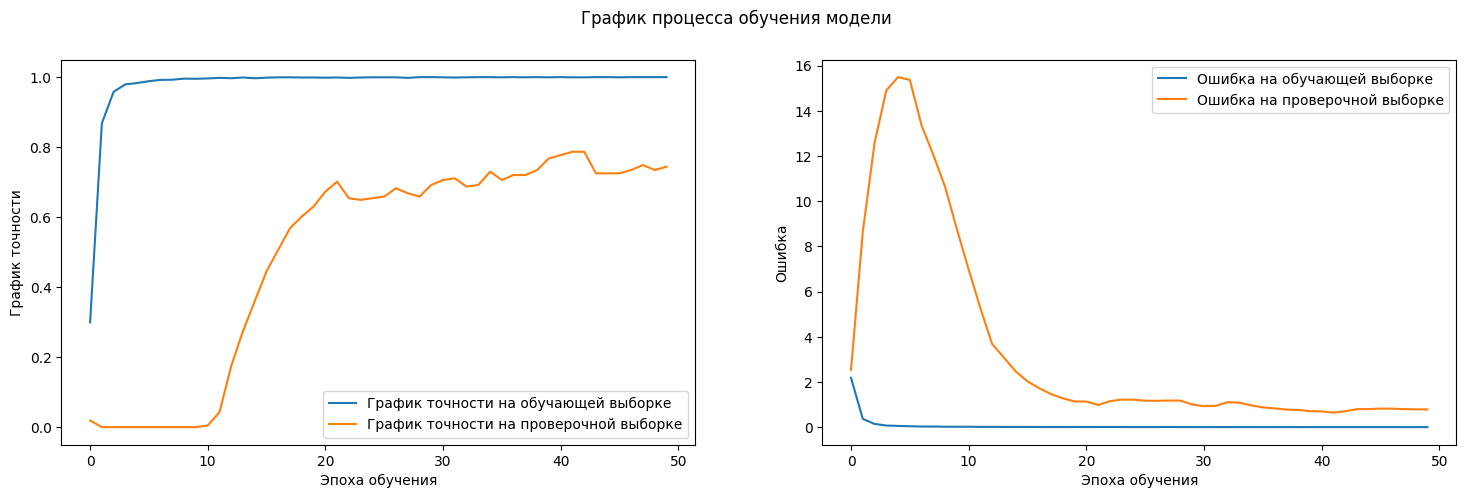

In [ ]:
show_plot(history)

6/6 [==============================] - 0s 5ms/step


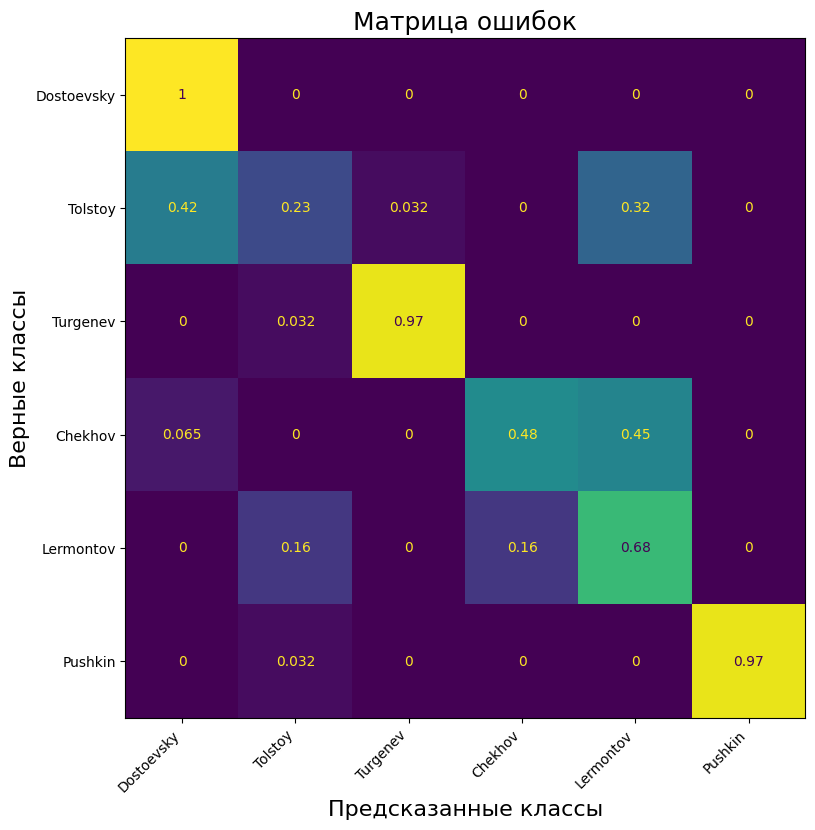


Средняя точность распознавания:  72%


In [ ]:
y_pred = model.predict(x_test)
show_confusion_matrix(y_test, y_pred, CLASS_LIST)

#### Итоги

Как мы видим, точность на обучающей выборке достигла 100%, на проверочной почти 79% на лучшей эпохе. При этом средняя точность на тестовых образцах составила всего 72% (рассчитанная по диагонали матрицы ошибок). При этом надо учитывать, что обучение мы проводили всего на 40 тыс. словах, что почти в 10 раз меньше примера из предыдущего [Блокнота](https://colab.research.google.com/drive/1KEFUgyBcqGaXGZEU-7MHENn5RH_AIvfH).

Поэтому, если у нас ограниченный датасет, то смотрим в сторону предобученных векторных представлений.

А теперь переходим, к [домашней работе](https://colab.research.google.com/drive/1t7rrJV4BSzFF8ZuiUQASkkq8ijzf0IiJ) и немного поэкспериментируем.